<a href="https://colab.research.google.com/github/gigieee/cis104-data-analytics-programming/blob/main/CIS104_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **รายงาน**













**รายงานวิชา CIS104 การเขียนโปรมแกรมวิเคราะห์ข้อมูล(Data Analytics Programming)**

สมาชิกในกลุ่ม


6624650294 น.ส.ธัญวรัตม์ กีรติพสุวัฒน์

6624650344 นายพรหมพิริยะ มุ่งงาม

6624650419 น.ส.ภัชราพร ตันติศิริโรจน์

6624650450 น.ส.ลานีน รมยะนนท์


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**การใช้งานของlibraryต่างๆ**



*   requests เป็น library ที่ใช้ในการส่งและรับข้อมูลผ่าน HTTP requests และใช้ในการเข้าถึงข้อมูลจากเว็บไซต์
*   BeautifulSoup เป็น library ที่ใช้ในการดึงข้อมูลที่ต้องการจากเว็บไซต์มาใช้
*   pandas เป็น library ที่ใช้ในการสร้างและจัดการข้อมูลที่อยู่ในรูปเเบบตาราง(Data Frame)
*   matplotlib เป็น library ที่ใช้สำหรับการสร้างกราฟและแผนภูมิ และการทำVisualization
*   seaborn เป็น library ที่ใช้สำหรับการสร้างกราฟที่สวยงามและแสดงข้อมูลทางสถิติใน Python

# import font

---



In [ ]:
import matplotlib as fontmat
!wget -q https://github.com/google/fonts/raw/main/ofl/sarabun/Sarabun-Regular.ttf
fontmat.font_manager.fontManager.addfont('Sarabun-Regular.ttf')
fontmat.rc('font', family='Sarabun')

**คำอธิบาย**

*  นำเข้าไลบรารี Matplotlib และตั้งชื่อเป็น fontmat เพื่อให้สามารถเข้าถึงไลบรารีนี้ได้ด้วยชื่อนี้ในโค้ด
*  ใช้คำสั่ง shell (!) เพื่อดาวน์โหลดไฟล์ Sarabun-Regular.ttf จาก URL ที่ระบุ และ -q ใช้สำหรับลดการแสดงผล (quiet mode) เพื่อไม่ให้แสดงข้อมูลการดาวน์โหลดทั้งหมดในหน้าจอ
*   เพิ่มฟอนต์ Sarabun-Regular.ttf เข้าไปใน Font Manager ของ Matplotlib
*   กำหนดให้ฟอนต์ทั้งหมดที่ใช้ในกราฟของ Matplotlib เป็น Sarabun โดยใช้ rc ของ Matplotlib





# Scraping

---



In [ ]:
main_url = 'https://sgulyano.github.io/eval/'

html_url = ['02226005.html',
            '08846113.html',
            '19689783.html',
            '24363682.html',
            '24674969.html',
            '26742703.html',
            '33472214.html',
            '33561138.html',
            '33565025.html',
            '41557226.html',
            '43951333.html',
            '44868136.html',
            '45435188.html',
            '48033334.html',
            '51435303.html',
            '53231654.html',
            '60189297.html',
            '61116032.html',
            '66887754.html',
            '68346670.html',
            '71728345.html',
            '79550445.html',
            '83255004.html',
            '94026030.html',
            '95860997.html',
            '96905621.html']
eval_url = [main_url + url for url in html_url]

def get_table_data(item):
    data = []
    table_body = item.find("tbody")
    rows = table_body.find_all("tr")
    for row in rows :
        cols = row.find_all(["td","th"])
        cols = [ele.text.strip() for ele in cols]
        data.append([ele for ele in cols if ele])
    return data

def get_data(url):
    # page = i
    r = requests.get(url)
    soup = BeautifulSoup(r.content,"html.parser")
    tables = soup.find_all("table")

    head = pd.DataFrame(get_table_data(tables[0]))
    subject = head.iloc[0,1]
    semester = head.iloc[2,1]
    section = head.iloc[1,1]
    review = head.iloc[5,1]
    register = head.iloc[4,1]
    degree = head.iloc[3,1]

    df = pd.DataFrame(get_table_data(tables[2]))
    df.dropna(how="all",inplace=True)
    df.columns = df.iloc[1,:]
    rows = [0,1]
    df.drop(rows,axis=0,inplace=True)

    for i in range(2,16):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])

    df.set_index("ที่",inplace=True)
    df.drop(df[df.index.str.match("รวม")].index,inplace=True)

    # Create Data Frame
    df = pd.DataFrame(get_table_data(tables[2]))
    df.dropna(how="all",inplace=True)
    df.columns = df.iloc[1,:]
    rows = [0,1]
    df.drop(rows,axis=0,inplace=True)

    # Change data type (object -> float)
    for i in range(2,16):
        df.iloc[:,i] = pd.to_numeric(df.iloc[:,i])


    # Set index to column "ที่"
    df.set_index("ที่",inplace=True)

    #เอา รวม และ รวมทั้งหมด ออก
    df.drop(df[df.index.str.match("รวม")].index,inplace=True)

    #Split section
    df["topic"] = ""
    top = ""

    for c,i in enumerate(df.index):
        if i.isnumeric():
            df.iloc[c,15] = top
        else:
            top = i

    df.dropna(how= "any" , inplace= True)

    #Change name ร้อยละ
    cols = []
    count = 5
    for column in df.columns:
        if column == 'ร้อยละ':
            cols.append(f'{count}(%)')
            count-=1
            continue
        cols.append(column)
    df.columns = cols

    if 'covid' in df.iloc[1,0].lower(): situation = 'covid'
    else: situation = 'normal'
    df["section"] = section
    df["subject"] = subject
    df["degree"] = degree
    df["semester"] = semester
    df["register"] = register
    df["review"] = review
    df['situation'] = situation
    #webbrowser.open(eval_url[page - 1])
    return head, df

all_df = []
all_head = []
for url in eval_url:
    head, df = get_data(url)
    all_head.append(head)
    all_df.append(df)

full = pd.concat(all_df).reset_index(drop=True)         #รวมtables
full['X-Bar'] = full['X-Bar'].astype('float64')         #แปลง obj to float
full = full.rename(columns = {'ข้อคำถาม' : 'question'})
display(full)


whole = pd.concat(all_head).reset_index(drop=True)
display(whole)

,question,5,5(%),4,4(%),3,3(%),2,2(%),1,...,X-Bar,SD,topic,section,subject,degree,semester,register,review,situation
0,สอนอย่างเป็นระบบ,4.0,66.67,1.0,16.67,0.0,0.0,1.0,16.67,0.0,...,4.33,1.21,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,231863,FGL497,ปริญญาตรี โครงการพิเศษ,1/2562,43,6 (13.95%),normal
1,สอนให้คิด วิเคราะห์ วิจารณ์,4.0,66.67,0.0,0.0,1.0,16.67,1.0,16.67,0.0,...,4.17,1.33,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,231863,FGL497,ปริญญาตรี โครงการพิเศษ,1/2562,43,6 (13.95%),normal
2,กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าส...,2.0,33.33,1.0,16.67,1.0,16.67,1.0,16.67,1.0,...,3.33,1.63,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,231863,FGL497,ปริญญาตรี โครงการพิเศษ,1/2562,43,6 (13.95%),normal
3,เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบก...,3.0,50.0,2.0,33.33,0.0,0.0,0.0,0.0,1.0,...,4.00,1.55,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,231863,FGL497,ปริญญาตรี โครงการพิเศษ,1/2562,43,6 (13.95%),normal
4,มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท...,3.0,50.0,2.0,33.33,1.0,16.67,0.0,0.0,0.0,...,4.33,0.82,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,231863,FGL497,ปริญญาตรี โครงการพิเศษ,1/2562,43,6 (13.95%),normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,ผู้สอนแทรกเนื้อหาเกี่ยวกับคุณธรรมจริยธรรมในการ...,15.0,51.72,9.0,31.03,3.0,10.34,2.0,6.9,0.0,...,4.28,0.92,ส่วนที่ 2 ข้อคำถามของคณะ/หน่วยงาน,231863,NYE553,ปริญญาตรี โครงการพิเศษ,1/2563,43,29 (67.44%),normal
320,โสตทัศนูปกรณ์ช่วยสอนในห้องเรียน เช่น ไมโครโฟน ...,14.0,48.28,8.0,27.59,5.0,17.24,1.0,3.45,1.0,...,4.14,1.06,ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้,231863,NYE553,ปริญญาตรี โครงการพิเศษ,1/2563,43,29 (67.44%),normal
321,สภาพของห้องเรียนหรือห้องปฏิบัติการ เช่น แสง อุ...,13.0,44.83,11.0,37.93,4.0,13.79,0.0,0.0,1.0,...,4.21,0.94,ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้,231863,NYE553,ปริญญาตรี โครงการพิเศษ,1/2563,43,29 (67.44%),normal
322,จำนวนอุปกรณ์ในการเรียนการสอนเพียงพอ และเหมาะสม...,15.0,51.72,6.0,20.69,5.0,17.24,0.0,0.0,3.0,...,4.03,1.3,ส่วนที่ 3 สภาพแวดล้อมและสิ่งสนับสนุนการเรียนรู้,231863,NYE553,ปริญญาตรี โครงการพิเศษ,1/2563,43,29 (67.44%),normal


,0,1,2,3,4,5,6,7
0,รายวิชา:,FGL497,None,None,None,None,None,None
1,Sec./Gr.:,231863,None,None,None,None,None,None
2,ภาคการศึกษาที่:,1/2562,None,None,None,None,None,None
3,ระดับการศึกษา:,ปริญญาตรี โครงการพิเศษ,None,None,None,None,None,None
4,จำนวนนักศึกษาที่จดทะเบียน:,43,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
255,จำนวนนักศึกษาที่ประเมิน:,29 (67.44%),None,None,None,None,None,None
256,ร้อยละการเข้าชั้นเรียนของผู้ตอบแบบประเมิน:,น้อยกว่าร้อยละ 60 = 0มากกว่าร้อยละ 60 = ...,น้อยกว่าร้อยละ 60,=,0,มากกว่าร้อยละ 60,=,29 (100.00%)
257,น้อยกว่าร้อยละ 60,=,0,None,None,None,None,None
258,มากกว่าร้อยละ 60,=,29 (100.00%),None,None,None,None,None


# import library



import libraryต่างๆที่จำเป็นต้องใช้งาน

---



## **คำอธิบายโค้ด**

ส่วนที่1

*   ใช้ตัวแปร main_url เพื่อเรียกใช้งานเว็บไซต์
*   ใช้ตัวแปร html_url เพื่อเรียกใช้งานเว็บไซต์่ย่อย
*   eval_url จะเก็บ url ที่เกิดจากmain_url+html_urlเพื่อนำlink ที่ได้ มาใช้ต่อ

ส่วนที่2
*   สร้างfunction get_table_data เพื่อดึงข้อมูลจากตารางเว็บไซต์
*   สร้างตัวแปร data เป็นลิสต์เปล่าเพื่อเก็บข้อมูลจากตาราง
*    ใช้ 'find' เพื่อหาแท็ก ('tbody') ภายในวัตถุ BeautifulSoup ('item'). 'tbody' เป็นแท็กที่ใช้เพื่อรองรับข้อมูลที่จะแสดงในตาราง
*    ใช้ find_all เพื่อหาทุกแถว ('tr') ใน 'tbody'. 'tr' เป็นแท็กที่ใช้เพื่อระบุแถวในตาราง
*   for row in rows ;
วนลูปผ่านทุกแถวในตาราง
*   ใช้ find_all เพื่อหาทุกเซลล์ ('td' และ 'th') ในแถว
 'td' คือแท็กที่ใช้เพื่อระบุเซลล์ข้อมูล, และ 'th' คือแท็กที่ใช้เพื่อระบุเซลล์หัวข้อ
*   วนลูปผ่านทุกเซลล์และนำข้อมูลทุกตัวที่ได้มาไปเก็บในลิสต์ cols โดยลบช่องว่างที่อาจมีอยู่ที่ด้านหน้าและด้านหลังข้อมูล'ele.text' ใช้เพื่อดึงข้อความที่อยู่ภายในแท็ก
*   นำข้อมูลที่ไม่ใช่ช่องว่างมาเก็บไว้ในลิสต์ 'data'. นี้ช่วยในการลบเซลล์ที่ว่างเปล่าออก
*   คืนค่าลิสต์ data ที่เก็บข้อมูลจากตารางในรูปแบบของลิสต์ของลิสต์

ส่วนที่3
*   get_data(url) นี้ใช้เพื่อดึงข้อมูลจากหน้าเว็บที่ระบุด้วย URL โดยใช้การส่งคำขอ HTTPด้วยไลบรารี requests และดึงข้อมูลจาก HTML ด้วย BeautifulSoup ซึ่งเป็นไลบรารีสำหรับการทำ web scraping
*   โค้ดส่งคำขอ HTTP GET ไปยัง URL ที่กำหนดเพื่อดึงเนื้อหา HTML ของหน้าเว็บ. ตัวแปร r จะเก็บ response ที่ได้จาก server ซึ่งรวมถึงเนื้อหา HTML
*   find_all("table") ใช้ในการหาทุกตารางในเอกสาร HTML ที่ถูกแปลงเป็น BeautifulSoup. จะคืนลิสต์ของตารางทั้งหมดที่พบในหน้าเว็บ

ส่วนที่4
*   ใช้ฟังก์ชัน get_table_data() เพื่อดึงข้อมูลจากตารางแรก (index 0) และสร้าง DataFrame ด้วย Pandas
*ใช้ .iloc[] เพื่อดึงข้อมูลจากแถวที่ 0 และคอลัมน์ที่ 1 ของ DataFrame และเก็บไว้ในตัวแปร subject
*ใช้ .iloc[] เพื่อดึงข้อมูลจากแถวที่ 2 และคอลัมน์ที่ 1 ของ DataFrame และเก็บไว้ในตัวแปร semester
*ใช้ .iloc[] เพื่อดึงข้อมูลจากแถวที่ 1 และคอลัมน์ที่ 1 ของ DataFrame และเก็บไว้ในตัวแปร section
*ใช้ .iloc[] เพื่อดึงข้อมูลจากแถวที่ 5 และคอลัมน์ที่ 1 ของ DataFrame และเก็บไว้ในตัวแปร review
*ใช้ .iloc[] เพื่อดึงข้อมูลจากแถวที่ 4 และคอลัมน์ที่ 1 ของ DataFrame และเก็บไว้ในตัวแปร register
*degree = head.iloc[3, 1]: ใช้ .iloc[] เพื่อดึงข้อมูลจากแถวที่ 3 และคอลัมน์ที่ 1 ของ DataFrame และเก็บไว้ในตัวแปร degree

ส่วนที่5
* สร้าง DataFrame จากข้อมูลที่ดึงมาจากตารางที่สาม (index 2)
*ลบแถวที่มีค่าทั้งหมดเป็น NaN ใน DataFrame
*กำหนดชื่อคอลัมน์จากแถวที่ 1
*สร้างลิสต์ rows ที่มีค่า [0, 1] แสดงถึง index ของแถวที่ต้องการลบ
*ลบแถวที่มี index อยู่ในลิสต์ rows จาก DataFrame

ส่วนที่6
*วนลูปเพื่อเปลี่ยนประเภทข้อมูลในคอลัมน์ที่ 2 ถึง 15 เป็นชนิดข้อมูลที่เป็นตัวเลข

ส่วนที่7
* ตั้งค่า index ของ DataFrame เป็นคอลัมน์ "ที่"

ส่วนที่8
* ลบแถวที่ index ตรงกับ "รวม" โดยใช้การใช้ .str.match("รวม") เพื่อหา index ที่ตรงกับรูปแบบ "รวม" และใช้ .drop เพื่อลบแถวนั้นออกจาก DataFrame

ส่วนที่9
* สร้างคอลัมน์ใหม่ที่ชื่อ "topic" และกำหนดค่าในคอลัมน์นี้เป็นข้อความว่าง
*สร้างตัวแปร top และกำหนดค่าเริ่มต้นเป็นข้อความว่าง

ส่วนที่10
* วนลูปผ่าน index และค่าของแถวใน DataFrame โดยใช้ enumerate เพื่อรับตัวแปร c เป็นลำดับของ index
* ตรวจสอบว่าค่าใน index เป็นตัวเลขหรือไม่
*ถ้าค่าใน index เป็นตัวเลข, กำหนดค่าในคอลัมน์ที่ 15 เป็นค่าของตัวแปร top
*ถ้าค่าใน index ไม่เป็นตัวเลข, กำหนดค่าของตัวแปร top เป็นค่าของ index

ส่วนที่11

* ลบแถวที่มีค่า NaN ใน DataFrame

ส่วนที่12
* สร้างลิสต์ cols เพื่อเก็บชื่อคอลัมน์ที่จะใช้
* วนลูปผ่านชื่อคอลัมน์ใน DataFrame
* ถ้าชื่อคอลัมน์เป็น "ร้อยละ", เพิ่มชื่อคอลัมน์ใหม่ลงในลิสต์ cols โดยให้มีรูปแบบใหม่เช่น "5(%)"
*ตั้งชื่อคอลัมน์ใหม่ใน DataFrame โดยใช้ลิสต์ cols

ส่วนที่13
* ถ้าข้อความ "covid" ปรากฏในคอลัมน์แรกของ DataFrame df (ที่ index 1) โดยไม่สนใจตัวพิมพ์เล็ก-ใหญ่ (lower()), ก็จะกำหนดค่าให้กับตัวแปร situation เป็น 'covid' ถ้าไม่เจอก็จะกำหนดเป็น 'normal'
*เพิ่มคอลัมน์ "section", "subject", "degree", "semester", "register", และ "review" ใน DataFrame df และกำหนดค่าให้เท่ากับตัวแปรที่ได้มาจากการประมวลผล DataFrame ที่เรียกใช้ get_data(url)
*เพิ่มคอลัมน์ "situation" ใน DataFrame df และกำหนดค่าให้เท่ากับตัวแปร situation ที่ได้รับการกำหนดค่า
*คืนค่า DataFrame head,df ที่ได้ประมวลผล

ส่วนที่14
* สร้าง list all_df เพื่อเก็บ DataFrame ที่ได้จากการดึงข้อมูลจาก URL แต่ละตัว และ all_head เพื่อเก็บข้อมูลที่ได้จากการดึง header ของแต่ละตาราง
*ทำการลูปทุกรายการใน eval_url และใช้ฟังก์ชัน get_data เพื่อดึงข้อมูลจาก URL นั้น ๆ ฟังก์ชัน get_data คืนค่า tuple ที่ประกอบด้วย header (head) และ DataFrame (df). ข้อมูล header ถูกเพิ่มเข้าไปใน all_head และ DataFrame ถูกเพิ่มเข้าไปใน all_df

ส่วนที่15
* ใช้ pd.concat เพื่อรวม DataFrame ทั้งหมดที่เก็บไว้ใน all_df เข้าด้วยกัน และ reset_index(drop=True) ใช้เพื่อรีเซ็ต index เพื่อให้ index เริ่มต้นที่ 0 และไม่เก็บ index เดิม
*แปลงข้อมูลในคอลัมน์ 'X-Bar' จาก object เป็น float64 เพื่อให้สามารถทำงานกับตัวเลขได้ถูกต้อง
*เปลี่ยนชื่อคอลัมน์ 'ข้อคำถาม' เป็น 'question' ใน DataFrame full
*แสดง DataFrame full ที่ผ่านการประมวลผลทั้งหมด

ส่วนที่16
* ใช้ pd.concat เพื่อรวม DataFrame ทั้งหมดที่เก็บไว้ใน all_head เข้าด้วยกัน และ reset_index(drop=True) ใช้เพื่อรีเซ็ต index เพื่อให้ index เริ่มต้นที่ 0 และไม่เก็บ index เดิม
*ใช้ display เพื่อแสดง DataFrame whole

**คำอธิบายdataframe**
* แสดงให้เห็นถึงข้อมูลรวมทั้งหมดที่ได้มา ได้แก่ คำถามส่วนที่1-3 คำถามที่ย่อยลงมาจากทั้ง3ส่วน ระดับการประเมิน ค่าx-bar ค่าsd ชื่อsection subject degree register review situation เป็นdataframe ที่มีข้อมูลครบ เพื่อกำหนดdf นำไปพิจารณาในแต่ละส่วนคำถาม





# Visualization

---



## **จุดประสงค์ที่ 1**:  สำรวจจำนวนclassทั้งหมดที่เปิดสอน และแบ่งตาม2สถานการณ์ นั่นคือ สถานการณ์ปกติ(normal) และ สถานการณ์โควิด(covid)

---



### แสดงสัดส่วนของจำนวนห้องเรียนทั้งหมดที่เปิดสอนในทั้งสถานการณ์ปกติและสถานการณ์โควิด:


In [ ]:
#Data Preparation
all_subj = full.drop_duplicates(['subject','section','semester'])
sub1 = all_subj['situation']

all_sub1 = sub1.value_counts().to_frame()
all_sub1['total'] = all_sub1['situation'].cumsum()
all_sub1

NameError: name 'full' is not defined

**คำอธิบายโค้ด**
*   สร้าง Dataframe all_subj ที่มีการกรองข้อมูลใน Dataframe full โดยลบแถวที่มีค่าในคอลัมน์ 'subject' , 'section' , 'semester' ซ้ำกันทั้งสามคอลัมน์ โดยใช้คำสั่ง drop_duplicates() เพื่อนับจำนวนclassที่เปิดสอนทั้งหมด
*   สร้าง Dataframe sub1 ที่มีการกรองข้อมูลใน Dataframe all_subj ให้แสดงค่าในคอลัมน์ 'situation' เท่านั้น
*   นับจำนวนของค่าที่ปรากฏในคอลัมน์ 'situation' ใน Dataframe sub1 และแสดงผลลัพธ์ในรูปแบบของ Dataframe all_sub1 ที่มีคอลัมน์ 'situation'แสดงจำนวนครั้งที่แต่ละสถานการณ์นั้นปรากฏ โดยใช้คำสั่ง value_counts().to_frame()
*   สร้างคอลัมน์ 'total' ใน Dataframe all_sub1 ที่ปรากฏค่าผลรวมสะสมของค่าในคอลัมน์ 'situation' นั่นคือ ผลรวมสะสมของจำนวนclassทั้งหมด โดยใช้คำสั่ง cumsum()
*   แสดง Dataframe all_sub1

**คำอธิบายdataframe**
* จะได้ออกมาเป็นสถานการณ์โควิด 15ห้องเรียน สถานการณ์ปัจจุบัน 11ห้องเรียน รวมทั้งหมด26ห้องเรียน


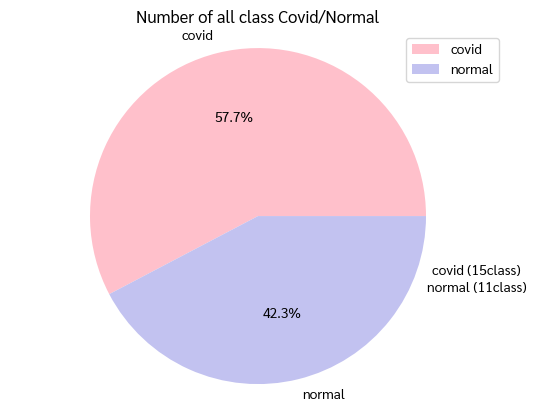

In [ ]:
# piechart

data = all_sub1.iloc[:,0].to_list()
labels=['covid','normal']
plt.pie(data,labels=labels,colors=['pink','#c2c2f0'], autopct='%1.1f%%')
plt.axis('equal')
for i, label in enumerate(labels):
    plt.annotate(f"{label} ({data[i]}class)", xy=(1.3, -0.35 - 0.1 * i), ha='center')
plt.legend(['covid','normal'])
plt.title('Number of all class Covid/Normal')
plt.show()

**คำอธิบายโค้ด**
*   ดึงค่าจากคอลัมน์แรกของ DataFrame all_sub1 และแปลงเป็นรายการ เพื่อนำไปใช้ในการสร้าง Pie Chart
*   กำหนดป้ายชื่อสำหรับคลาส 'covid' และ 'normal' ที่จะแสดงใน Pie Chart
*สร้าง Pie Chart โดยใช้ข้อมูลและป้าย และกำหนดสีสำหรับแต่ละแผ่น ('pink' สำหรับ 'covid' และ '#c2c2f0' สำหรับ 'normal') พารามิเตอร์ autopct ใส่ป้ายเปอร์เซ็นต์ในแต่ละแผ่น
*ทำให้ Pie Chart แสดงเป็นวงกลม
*ลูปนี้เพิ่มหมายเหตุด้านนอก Pie Chart เพื่อแสดงชื่อคลาสและจำนวนที่เกี่ยวข้อง
*เพิ่มคำอธิบาย (Legend) ด้วยชื่อคลาส
*กำหนดชื่อกราฟ

**คำอธิบายกราฟ**
* จากห้องเรียนทั้งหมด26ห้องเรียน ห้องเรียนในสถานการณ์โควิด 15ห้องเรียน คิดเป็นเปอร์ของห้องเรียนทั้งหมดคือ 57.7%
* จากห้องเรียนทั้งหมด26ห้องเรียน ห้องเรียนในสถานการณ์ปกติ 11ห้องเรียน คิดเป็นเปอร์ของห้องเรียนทั้งหมดคือ 42.3%







> สรุป

ข้อมูลที่ได้รับมา ต้องการให้เห็นว่าจากห้องเรียนทั้งหมด26ห้องเรียน ห้องเรียนในสถานการณ์โควิด มีมากกว่าห้องเรียนในสถานการณ์ปกติ เพื่อที่จะนำจำนวนห้องเรียนของทั้งสองสถานการณ์ไปตอบคำถามต่อไป



## **จุดประสงค์ที่ 2**:  สำรวจคำถามที่มีระดับการประเมินเฉลี่ยจากทุกclassต่ำที่สุดเพื่อนำไปพัฒนาการสอน โดยแยกเป็น2สถานการณ์ นั่นคือ สถานการณ์ปกติ(normal) และ สถานการณ์โควิด(covid)

---



### ในสถานการณ์ปกติ
เปรียบเทียบระดับการประเมินเฉลี่ยของคำถามส่วนที่1จากทุกclassในสถานการณ์ปกติ



In [ ]:
df_n = full[(full['situation']=='normal')]
df_n1 = df_n[(df_n['topic']=='ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย')]

df_n1['question'].value_counts().to_frame() #พบคำถามที่พิมผิด
#หาแถวที่มีค่าที่พิมผิด
df_n3 = df_n1[(df_n1['question']=='กระตุ้นบรรยากาศการเรียนการสอน  มีวิธีสอนที่น่าสนใจและน่าติดตาม')]
df_n3

,question,5,5(%),4,4(%),3,3(%),2,2(%),1,...,X-Bar,SD,topic,section,subject,degree,semester,register,review,situation
74,กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่า...,29.0,30.85,26.0,27.66,22.0,23.4,11.0,11.7,5.0,...,3.68,1.19,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,556574,RMW014,ปริญญาตรี โครงการปกติ,1/2562,501,94 (18.76%),normal
190,กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่า...,11.0,36.67,4.0,13.33,9.0,30.0,2.0,6.67,3.0,...,3.62,1.35,ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย,556574,RMW014,ปริญญาตรี โครงการปกติ,2/2561,326,30 (9.20%),normal


**คำอธิบายโค้ด**
- สร้าง Dataframe df_n ที่มีการกรองข้อมูลใน DataFrame full โดยเลือกเฉพาะแถวที่มีค่า 'normal'  ในคอลัมน์ 'situation'
- สร้าง Dataframe df_n1 ที่มีการกรองข้อมูลใน DataFrame df_n โดยเลือกเฉพาะแถวที่มีค่า 'ส่วนที่ 1 ข้อคำถามกลางของมหาวิทยาลัย' ในคอลัมน์ 'topic'
เพื่อพิจารณาเพียงแค่คำถามส่วนที่1เท่านั้น เนื่องจากมีการเก็บระดับการประเมินของคำถามในส่วนที่1 ทุกclass
*   นับจำนวนของค่าที่ปรากฏในคอลัมน์ 'question' ของ DataFrame df_n1 และแสดงผลลัพธ์ในรูปแบบของ DataFrame ที่มีคอลัมน์เดียวคือ 'question' และคอลัมน์ 'count' เพื่อแสดงจำนวนครั้งที่แต่ละคำถามปรากฏ จะสังเกตุได้ว่ามี คำถามที่ความหมายเดียวกัน แต่มีการพิมผิด จึงทำการ Clean data โดยเริ่มหาตำแหน่งแถวที่ผิด
*   DataFrame df_n3 แสดงแถวที่มีค่าที่พิมผิดในคอลัมน์ 'question' ในที่นี้คือ แถวที่ 74 และ 190

**คำอธิบายdataframe**
* เพื่อหาค่าที่พิมผิดในคำถามส่วนที่1 ที่คำถามมีข้อมูลที่ผิดคือ มีการเว้นวรรคผิด จึงทำให้ข้อมูลที่เราดึงมาผิดพลาดได้ ต้องนำมาแก้ไข แล้วจึงสามารถสร้างdfเพื่อตอบคำถามต่อไปได้


In [ ]:
#แก้ไขข้อมูลใน DataFrame ในตำแหน่งที่ระบุ
df_n1.at[74,'question'] = 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
df_n1.at[190,'question'] = 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
df_n1['question'].value_counts().to_frame() #เพื่อเป็นการเช็คว่าค่าที่ผิดถูกแก้ไขเรียบร้อย
df_n2 = df_n1[["question","X-Bar"]]
df_n2 = df_n2.groupby('question').mean().round(2)
df_n2

,X-Bar
question,
กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม,3.67
ทำให้เห็นความสัมพันธ์กับวิชาอื่นที่เกี่ยวข้อง,4.14
มีการให้นำเสนองาน/มีการวัดผลโดยวิธีอื่นๆที่สะท้อนความสามารถของผู้เรียนนอกเหนือจากการตอบข้อสอบ,4.28
สอนอย่างเป็นระบบ,4.28
สอนให้คิด วิเคราะห์ วิจารณ์,4.10
เปิดโอกาสให้แสดงความคิดเห็นและแลกเปลี่ยนประสบการณ์ ทั้งภายในและภายนอกห้องเรียน,4.17
แนะนำแหล่งค้นคว้าข้อมูลเพิ่มเติมให้,4.13
ใช้สื่อและอุปกรณ์ช่วยสอนได้ดี,4.28


**คำอธิบายโค้ด**

*   แทนที่ค่าในแถวที่ 74 ,คอลัมน์ 'question' เป็น 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
*   แทนที่ค่าในแถวที่ 190 ,คอลัมน์ 'question' เป็น 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
- นับจำนวนของค่าที่ปรากฏในคอลัมน์ 'question' ของ DataFrame df_n1 และแสดงผลลัพธ์ในรูปแบบของ DataFrame ที่มีคอลัมน์เดียวคือ 'question' และคอลัมน์ 'count' เพื่อแสดงจำนวนครั้งที่แต่ละคำถามปรากฏ
- สร้าง DataFrame df_n2 จาก DataFrame df_n1 โดยเลือกเฉพาะคอลัมน์ "question" และ "X-Bar"
- จัดกลุ่มข้อมูลใน DataFrame df_n2 ตามคอลัมน์ 'question' และคำนวณค่าเฉลี่ย (mean) ของแต่ละกลุ่ม จากนั้นทำการปัดเศษทศนิยมไปที่ 2 ตำแหน่ง ด้วยคำสั่ง round(2)
*   แสดง Dataframe df_n2

**คำอธิบายdataframe**
* แสดงให้เห็นถึง ค่าของx-barในทุกคำถามของคำถามส่วนที่1 เพื่อที่จะนำข้อมูลไปสร้างกราฟต่อ


<ipython-input-9-11d410d8aa19>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="X-Bar", y="question", data=df_n2.reset_index(), palette="colorblind", orient='h')


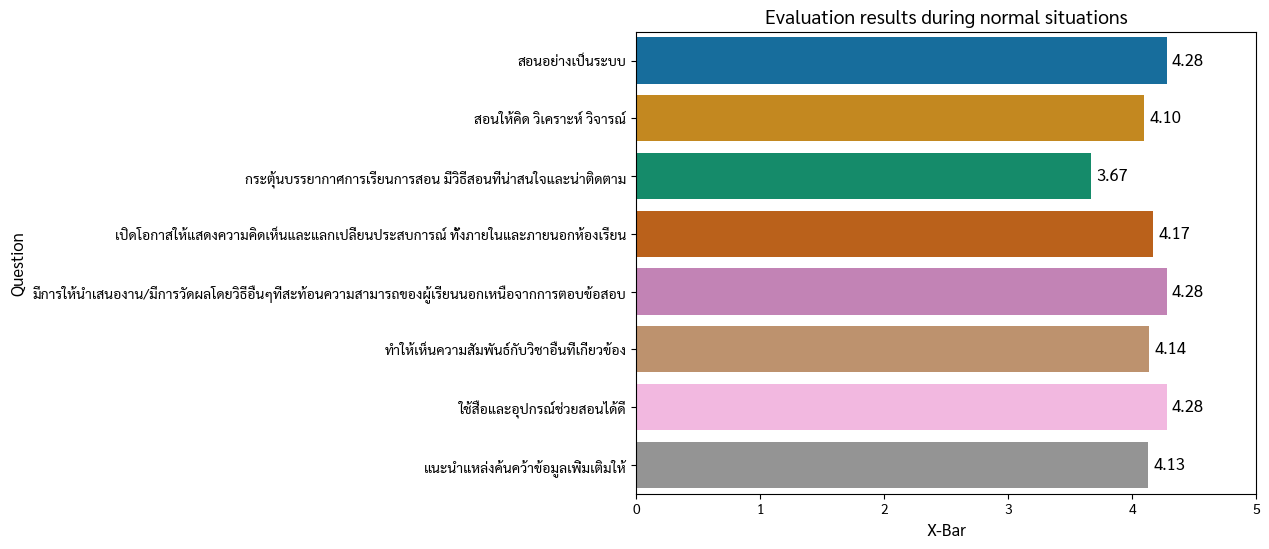

In [ ]:
#กำหนดขนาดของกราฟ
plt.figure(figsize=(8, 6))

# สร้างกราฟสถานการณ์ปกติ
df_n2  = df_n2.iloc[[3,4,0,5,2,1,7,6]]
sns.barplot(x="X-Bar", y="question", data=df_n2.reset_index(), palette="colorblind", orient='h')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(15, 0), textcoords='offset points', fontsize=12)

plt.title('Evaluation results during normal situations', fontsize=14)
plt.xlabel('X-Bar', fontsize=12)
plt.ylabel('Question', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks([0, 1, 2, 3, 4, 5])

# แสดงกราฟ
plt.show()

**คำอธิบายโค้ด**

*   กำหนดขนาดของกราฟเป็น 8x6 นิ้วโดยใช้ plt.figure
*ใช้เพื่อเรียงลำดับแถวใน DataFrame df_n2 ตามลำดับที่ระบุในลิสต์ [3,4,0,5,2,1,7,6] นั่นคือ เลือกแถวที่มี index เป็น 3, 4, 0, 5, 2, 1, 7, 6 และจัดเรียงลำดับตามลิสต์นี้
*    สร้างกราฟแท่งโดยให้แกน x เป็นค่าในคอลัมน์ "X-Bar" และแกน y เป็นค่าในคอลัมน์ "question" ของข้อมูลที่เก็บใน DataFrame df_n2 ซึ่งได้รับการรีเซ็ต index มีการใช้ palette "colorblind" เพื่อกำหนดสีของแท่ง และ orient='h' หมายถึงกราฟแท่งนี้เป็นแนวนอน
*   ในการวนลูปผ่านแต่ละแท่งในกราฟ เพื่อใส่ข้อความที่แสดงค่าของแท่งลงไป
*  ใส่ป้ายกำกับ (annotation) ที่แสดงค่าของแต่ละแท่งที่บนกราฟ. โดยใช้ plt.gca().patches เพื่อเข้าถึงแต่ละแท่ง และ plt.annotate เพื่อแสดงข้อความที่บอกถึงค่าของแท่งนั้น ๆ
*   กำหนดชื่อกราฟ ชื่อแกน x ชื่อแกน y
*   กำหนดขนาดของ tick labels บนแกน
*   กำหนดแถบแกน x ที่จะแสดง
*   แสดงกราฟ

**คำอธิบายกราฟ**
* แสดงให้เห็นถึงคำถามที่มีการประเมินเฉลี่ยน้อยสุดคือ การกระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม ซึ่งได้ค่าเฉลี่ยการประเมินคือ 3.67





> สรุป


  กราฟแสดงการเปรียบเทียบระดับการประเมินเฉลี่ยของคำถามส่วนที่1จากทุกclassในสถานการณ์ปกติ เพื่อพิจารณาหาคำถามจากส่วนคำถามที่ 1ที่มีระดับการประเมินเฉลี่ยจากทุกclassน้อยที่สุด และสามารถนำไปปรับปรุง สำหรับการพัฒนาการสอนต่อไป ซึ่งคำถามที่มีการประเมินเฉลี่ยน้อยสุดคือ การกระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม อาจวิเคราะห์ได้ว่า อาจารย์สอนน่าเบื่อและไม่มีสิ่งกระตุ้นการเรียนการสอน ดังนั้นอาจารย์ควรทำให้การเรียนการสอนน่าสนใจขึ้นและไม่น่าเบื่อ โดยการเพิ่มเทคนิคเข้าไป สังเกตุว่านักเรียนชอบการเรียนการสอนแบบไหน เพื่อที่จะปรับปรุง อาจะทำแบบสอบถาม เพื่อปรุบปรุงการเรียนการสอนให้ดีขึ้น


### ในสถานการณ์โควิด
เปรียบเทียบระดับการประเมินเฉลี่ยของคำถามจากทุกclassในสถานการณ์โควิด

In [ ]:
df_cov = full[(full['situation']=='covid')]

df_cov['X-Bar'] = df_cov['X-Bar'].astype('float64')
df_cov['question'].value_counts().to_frame()

df_cov1 = df_cov[["question","X-Bar"]]

df_cov1 = df_cov1.groupby('question').mean().round(2)
df_cov1

<ipython-input-10-a7dd3b85d7f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cov['X-Bar'] = df_cov['X-Bar'].astype('float64')


,X-Bar
question,
ผู้สอนกระตุ้นและส่งเสริมให้นักศึกษาซักถาม คิด วิเคราะห์ วิจารณ์ แสดงความคิดเห็น และส่งเสริมการค้นคว้าด้วยตนเอง พร้อมแนะนำแหล่งความรู้เพิ่มเติม,4.26
"ผู้สอนมีการกำหนดวัตถุประสงค์, หัวข้อการสอน, และมีเอกสารอ่านประกอบ",4.65
ผู้สอนมีการประเมินผล ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,4.43
ผู้สอนมีการสอน ตามสภาพจริง เหมาะสมภายใต้ข้อจำกัดในสถานการณ์ COVID-19 และสอดคล้องกับมาตรฐานการเรียนรู้ / ตัวชี้วัด,4.49
ผู้สอนมีการเตรียมการสอนมาอย่างดี สอนอย่างมีขั้นตอนและต่อเนื่อง ตามเค้าโครงการสอนหรือเนื้อหาวิชาที่รับผิดชอบภายใต้ข้อจำกัดในการเรียนการสอนออนไลน์,4.44
ผู้สอนสร้างช่องทางการติดต่อกับผู้เรียน ในการปรึกษาข้อสงสัยในหัวข้อที่เรียน ทำให้การเรียนเป็นไปตามวัตถุประสงค์,4.42
ผู้สอนส่งเสริมให้นักศึกษามีคุณธรรม จริยธรรม และปลูกฝังจิตสํานึกให้นักศึกษานําไปประพฤติและปฏิบัติได้อย่างเหมาะสม,4.42
ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น,4.19


**คำอธิบายโค้ด**
- การสร้าง DataFrame df_cov จาก DataFrame full โดยการกรองข้อมูลเฉพาะแถวที่มีค่า'covid'ในคอลัมน์ 'situation'
- เปลี่ยนประเภทข้อมูล (data type) ของคอลัมน์ 'X-Bar' ใน DataFrame df_cov เป็น 'float64'
- นับจำนวนของค่าที่ปรากฏในคอลัมน์ 'question' ของ DataFrame df_cov และแสดงผลลัพธ์ในรูปแบบของ DataFrame ที่มีคอลัมน์เดียวคือ 'question' และคอลัมน์ 'count' เพื่อแสดงจำนวนครั้งที่แต่ละคำถามปรากฏ
- สร้าง DataFrame df_cov1 จาก DataFrame df_cov โดยเลือกเฉพาะคอลัมน์ "question" และ "X-Bar"
- จัดกลุ่มข้อมูลใน DataFrame df_cov1 ตามคอลัมน์ 'question' และคำนวณค่าเฉลี่ย (mean) ของแต่ละกลุ่ม จากนั้นทำการปัดเศษทศนิยมไปที่ 2 ตำแหน่ง ด้วยคำสั่ง round(2)
*   แสดง Dataframe df_cov1

**คำอธิบายdataframe**
* แสดงให้เห็นถึง ค่าของx-barในทุกคำถามของคำถามส่วนที่1 เพื่อที่จะนำข้อมูลไปสร้างกราฟต่อ




<ipython-input-11-4d2ca37ada0d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="X-Bar", y="question", data=df_cov1.reset_index(), palette="bright", orient='h')


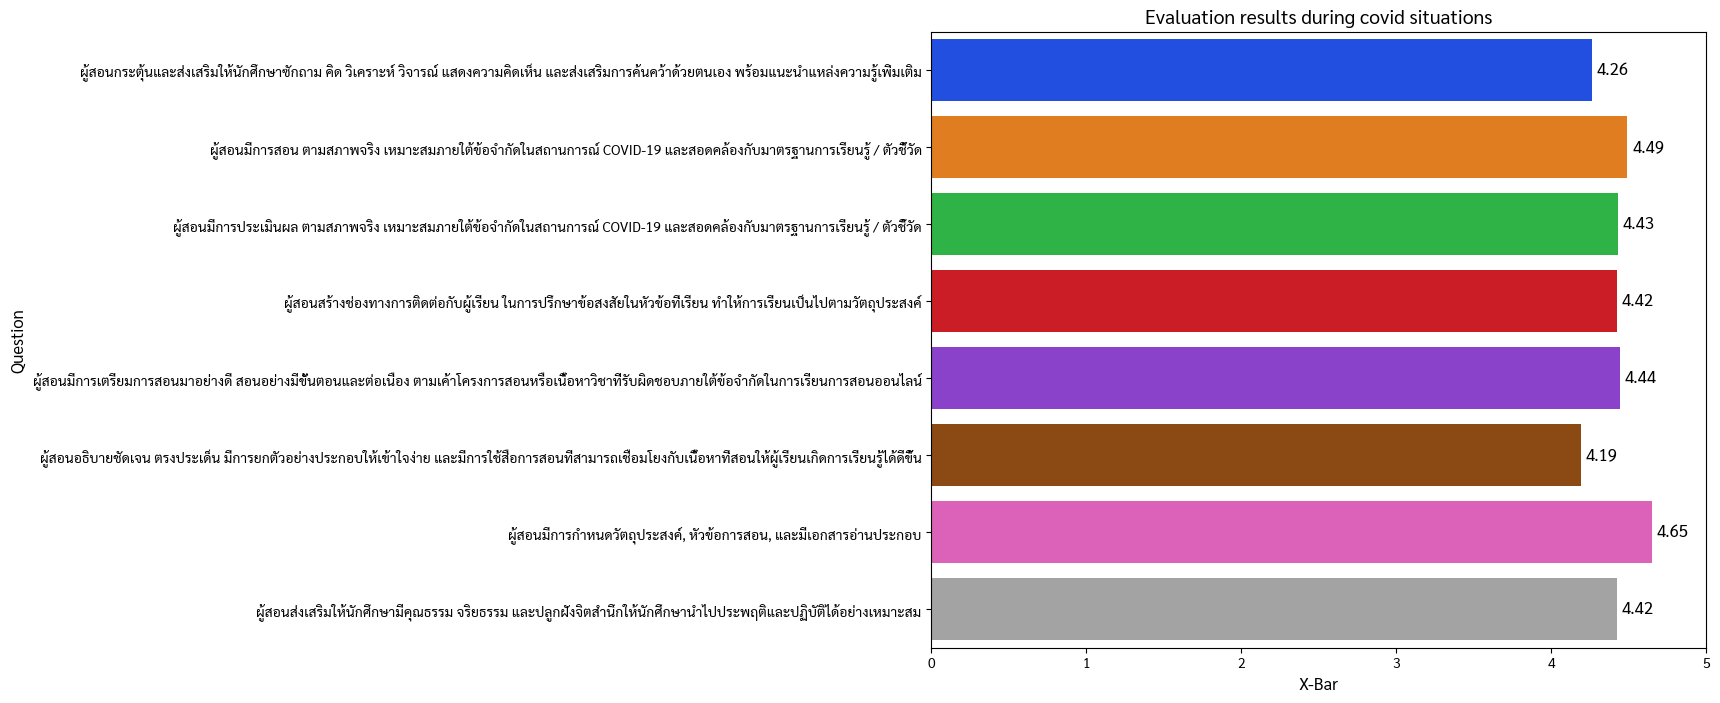

In [ ]:
# กำหนดขนาดของกราฟ
plt.figure(figsize=(10, 8))

# สร้างกราฟสถานการณ์ปกติ
df_cov1 = df_cov1.iloc[[0,3,2,5,4,7,1,6]]
sns.barplot(x="X-Bar", y="question", data=df_cov1.reset_index(), palette="bright", orient='h')
for p in plt.gca().patches:
    plt.annotate(f'{p.get_width():.2f}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                 ha='center', va='center', xytext=(15, 0), textcoords='offset points', fontsize=12)

plt.title('Evaluation results during covid situations', fontsize=14)
plt.xlabel('X-Bar', fontsize=12)
plt.ylabel('Question', fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xticks([0, 1, 2, 3, 4, 5])

# แสดงกราฟ
plt.show()

**คำอธิบายโค้ด**

*   กำหนดขนาดของกราฟเป็น 10x8 นิ้วโดยใช้ plt.figure
*เพื่อเรียงลำดับแถวใน DataFrame df_cov1 ตามลำดับที่ระบุในลิสต์ [0,3,2,5,4,7,1,6] นั่นคือ, เลือกแถวที่มี index เป็น 0, 3, 2, 5, 4, 7, 1, 6 และจัดเรียงลำดับตามลิสต์นี้
*    สร้างกราฟแท่งโดยให้แกน x เป็นค่าในคอลัมน์ "X-Bar" และแกน y เป็นค่าในคอลัมน์ "question" ของข้อมูลที่เก็บใน DataFrame df_cov1 ซึ่งได้รับการรีเซ็ต index มีการใช้ palette "bright" เพื่อกำหนดสีของแท่ง และ orient='h' หมายถึงกราฟแท่งนี้เป็นแนวนอน
*   ในการวนลูปผ่านแต่ละแท่งในกราฟ เพื่อใส่ข้อความที่แสดงค่าของแท่งลงไป
*  ใส่ป้ายกำกับ (annotation) ที่แสดงค่าของแต่ละแท่งที่บนกราฟ. โดยใช้ plt.gca().patches เพื่อเข้าถึงแต่ละแท่ง และ plt.annotate เพื่อแสดงข้อความที่บอกถึงค่าของแท่งนั้น ๆ
*   กำหนดชื่อกราฟ ชื่อแกน x ชื่อแกน y
*   กำหนดขนาดของ tick labels บนแกน
*   กำหนดแถบแกน x ที่จะแสดง
*   แสดงกราฟ

**คำอธิบายกราฟ**
* แสดงให้เห็นถึงคำถามที่มีการประเมินเฉลี่ยน้อยสุดคือ ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น ซึ่งได้ค่าเฉลี่ยการประเมินคือ 4.19





> สรุป

  กราฟแสดงการเปรียบเทียบระดับการประเมินเฉลี่ยของคำถามจากทุกclassในสถานการณ์โควิด เพื่อพิจารณาหาคำถามที่มีระดับการประเมินเฉลี่ยจากทุกclassน้อยที่สุด และสามารถนำไปปรับปรุง สำหรับการพัฒนาการสอนต่อไป ซึ่งคำถามที่ที่มีการประเมินน้อยที่สุดคือ ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น อาจวิเคราะห์ได้ว่า อาจารย์อาจจะสอนไม่ตรงประเด็น นอกเรื่อง และไม่ได้มีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ ดังนั้น อาจารย์ไม่ควรออกนอกเรื่องของการเรียนการสอนมากเกินไป เพราะอาจจะทำให้สอนไม่ทันได้ และเรื่องการสอนไม่ตรงประเด็น เพราะพูดออกนอกเรื่อง ควรปรับปรุง


## **จุดประสงค์ที่ 3** :  เพื่อหาclassที่มีระดับคะแนนการประเมินเฉลี่ยต่ำสุด จากข้อคำถามที่มีระดับการประเมินเฉลี่ยจากทุกclassน้อยที่สุดในแต่ละสถานการณ์

---


### ในสถานการณ์ปกติ
 " classใดที่มีระดับการประเมินเฉลี่ยน้อยที่สุด "

เปรียบเทียบระดับการประเมินเฉลี่ยของแต่ละclassจากคำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม"

In [ ]:
df_n = full[(full['situation']=='normal')]
#แก้ไขข้อคำถามที่พิมผิด
df_n.at[74,'question'] = 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
df_n.at[190,'question'] = 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
df_questn = df_n[(df_n['question'] =='กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม')]
df_class = df_questn[['section','subject','semester','X-Bar']]

df_class

,section,subject,semester,X-Bar
2,231863,FGL497,1/2562,3.33
30,231863,DRI970,1/2563,4.15
74,556574,RMW014,1/2562,3.68
102,231863,YRY790,2/2561,3.14
146,231863,YRY790,1/2562,3.92
190,556574,RMW014,2/2561,3.62
202,270981,DHT256,2/2562,4.00
222,231863,NVI781,2/2561,3.43
266,728025,YRY790,1/2563,3.13
286,728025,DRI970,1/2563,3.92


**คำอธิบายโค้ด**

DataFrameนี้แสดงให้เห็นถึง ค่าX-Bar ของแต่ละclass
*   การสร้าง Dataframe df_n จาก Dataframe full โดยการกรองข้อมูลเฉพาะแถวที่มีค่า 'normal' ในคอลัมน์ 'situation'
*   แทนที่ค่าในแถวที่ 74 ,คอลัมน์ 'question' ใน Dataframe df_n เป็น 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
*   แทนที่ค่าในแถวที่ 190 ,คอลัมน์ 'question' ใน Dataframe df_n เป็น 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม'
*   การสร้าง Dataframe df_questn จาก Dataframe df_n โดยการกรองข้อมูลเฉพาะแถวที่มีค่า 'กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม' ในคอลัมน์ 'question'
*   สร้าง DataFrame df_class จาก DataFrame df_questn โดยเลือกเฉพาะคอลัมน์ 'section' , 'subject' , 'semester' , 'X-Bar'
*   แสดง Dataframe df_class

**คำอธิบายdataframe**
* แสดงให้เห็นถึงsection subject semester x-bar เพื่อนำข้อมูลไปใช้ต่อไป



In [ ]:
#เรียงค่าในคอลัมน์ 'X-Bar'จากมากไปน้อย
df_class2 = df_class.sort_values(by = 'X-Bar',ascending=False)
df_class2

,section,subject,semester,X-Bar
30,231863,DRI970,1/2563,4.15
306,231863,NYE553,1/2563,4.03
202,270981,DHT256,2/2562,4.00
146,231863,YRY790,1/2562,3.92
286,728025,DRI970,1/2563,3.92
74,556574,RMW014,1/2562,3.68
190,556574,RMW014,2/2561,3.62
222,231863,NVI781,2/2561,3.43
2,231863,FGL497,1/2562,3.33
102,231863,YRY790,2/2561,3.14


**คำอธิบายโค้ด**

DataFrame นี้ แสดงถึงการเรียงตัวของ ระดับคะแนนเฉลี่ยจากมากไปน้อย
*   สร้าง DataFrame df_class2 โดยการเรียงค่าในคอลัมน์ 'X-Bar' ของ DataFrame df_class จากมากไปน้อย
*   แสดง DataFrame df_class2

**คำอธิบายdataframe**

* แสดงให้เห็นถึงsection subject semester x-bar เพื่อนำข้อมูลไปใช้ต่อไป

In [ ]:
df_class3 = df_class2.reset_index(drop=True)
df_class3['class_name'] = df_class3.apply(lambda row: f"{row['subject']} - {row['section']} - {row['semester']}", axis=1)

df_class4 = df_class3.drop(columns=df_class3[['section','subject','semester']])

df_class4['class'] = df_class4.index + 1

df_class4

,X-Bar,class_name,class
0,4.15,DRI970 - 231863 - 1/2563,1
1,4.03,NYE553 - 231863 - 1/2563,2
2,4.00,DHT256 - 270981 - 2/2562,3
3,3.92,YRY790 - 231863 - 1/2562,4
4,3.92,DRI970 - 728025 - 1/2563,5
5,3.68,RMW014 - 556574 - 1/2562,6
6,3.62,RMW014 - 556574 - 2/2561,7
7,3.43,NVI781 - 231863 - 2/2561,8
8,3.33,FGL497 - 231863 - 1/2562,9
9,3.14,YRY790 - 231863 - 2/2561,10


**คำอธิบายโค้ด**

DataFrameนี้ แสดงถึง ชื่อclass ที่plotลงกราฟ

*   การสร้าง Dataframe df_class3 จาก Dataframe df_class2  โดยการจัดอันดับindexใหม่

*   สร้างคอลัมน์ 'class_name'ที่แสดงค่ารวม ของค่าในคอลัมน์ 'subject' , 'section' , 'semester'
*   สร้าง DataFrame df_class4 โดยการลบคอลัมน์ 'subject' , 'section' , 'semester' จาก DataFrame df_class3
*   สร้างคอลัมน์ จาก Dataframe df_class4  โดยให้แสดงผลเป็นค่าอันดับบวก1
*   แสดง Dataframe df_class4

**คำอธิบายdataframe**

* แสดงให้เห็นถึงsection subject semester x-bar เพื่อนำข้อมูลไปใช้ต่อไป

<ipython-input-15-910a81b80621>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_chart = sns.barplot(x='class', y='X-Bar', data=df_class4, palette=['orange' if x == df_class4['color'].values[0] else 'gray' for x in df_class4['class']])


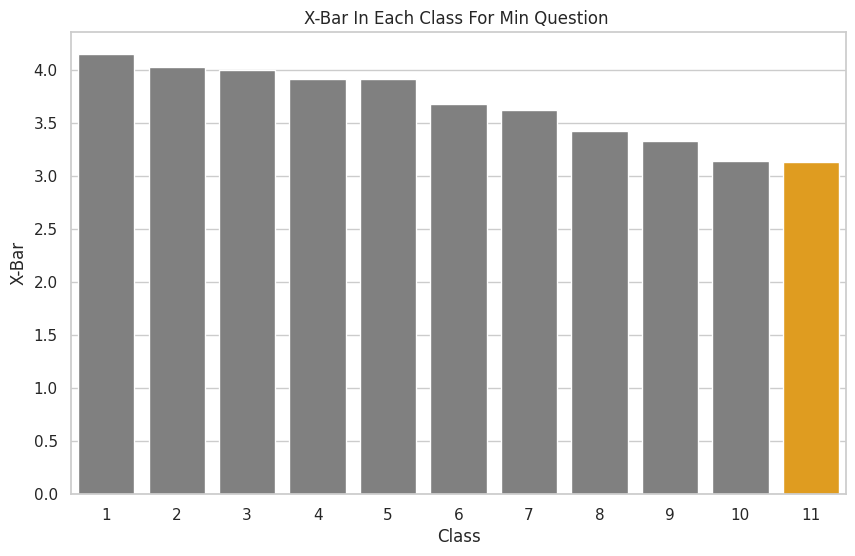

In [ ]:
df_class4['color'] = df_class4['X-Bar'].idxmin() + 1

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='class', y='X-Bar', data=df_class4, palette=['orange' if x == df_class4['color'].values[0] else 'gray' for x in df_class4['class']])

plt.title('X-Bar In Each Class For Min Question ')
plt.xlabel('Class')
plt.ylabel('X-Bar')

plt.show()

**คำอธิบายโค้ด**

*   เพิ่มคอลัมน์ 'color' ลงใน DataFrame df_class4 โดยกำหนดค่าให้เท่ากับอินเด็กซ์ที่มีค่าต่ำสุดในคอลัมน์ 'X-Bar' บวกด้วย 1 ในทุกแถวของคอลัมน์ 'color' เพื่อระบุคลาสที่มีค่า 'X-Bar' ต่ำที่สุด
*   ตั้งค่าสไตล์ของกราฟใน Seaborn เป็น "whitegrid"

*   ใช้ฟังก์ชัน barplot ของ Seaborn โดยกำหนดแกน x เป็นคอลัมน์ 'class' และแกน y เป็นคอลัมน์ 'X-Bar' จาก DataFrame df_class4 สีของแต่ละแท่งถูกกำหนดโดยตั้งเงื่อนไข ถ้าคลาสเท่ากับคลาสที่มีค่า 'X-Bar' ต่ำที่สุด จะให้สีส้ม นอกเหนือจากนั้นกราฟแท่งจะให้สีเทา
เพื่อเป็นการแสดงให้เห็นถึงclassที่มีระดับการประเมินเฉลี่ยของคำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" น้อยที่สุด
*   แสดงกราฟด้วยคำสั่ง plt.show()

**คำอธิบายกราฟ**

* แสดงให้เห็นว่ากราฟแท่งที่11 เป็นกราฟที่มีค่าการประเมินน้อยที่สุดของคำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" ซึ่งคือclass"YRY790 - 728025 - 1/2563	"












> สรุป

จากกราฟ 'X-Bar In Each Class For Min Question Normal' แสดงให้เห็นถึงระดับการประเมินเฉลี่ยของแต่ละclassที่ประเมินคำถามที่ควรปรับปรุงมากที่สุดในสถานการณ์ปกติ นั่นคือ คำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" ดังนั้นจะเห็นได้ว่า classที่ 11 "YRY790 - 728025 - 1/2563	" มีคะแนนการประเมินเฉลี่ยน้อยที่สุด



### **ในสถานการณ์โควิด**
 " classใดที่มีระดับการประเมินเฉลี่ยน้อยที่สุด "

เปรียบเทียบค่าเฉลี่ยระดับการประเมินของแต่ละclassจากคำถาม "ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น"


In [ ]:
df_cov = full[(full['situation']=='covid')]

df_questcov = df_cov[(df_cov['question'] =='ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น')]

df_classcov = df_questcov[['section','subject','semester','X-Bar']]
df_classcov

,section,subject,semester,X-Bar
25,728025,FGL497,2/2563,4.00
53,231863,FGL497,2/2562,3.60
61,556574,RMW014,2/2562,3.22
69,231863,NYE553,1/2564,4.71
89,231863,AZW892,2/2564,4.61
97,231863,NVI781,1/2564,4.65
125,231863,NVI781,2/2563,4.25
133,231863,FGL497,2/2563,4.67
141,231863,DRI970,1/2564,4.15
169,231863,YRY790,1/2564,3.64


**คำอธิบายโค้ด**
*   การสร้าง Dataframe df_cov จาก Dataframe full โดยการกรองข้อมูลเฉพาะแถวที่มีค่า 'covid' ในคอลัมน์ 'situation'
*   สร้าง Dataframe df_questcov จาก Dataframe df_cov โดยการกรองข้อมูลเฉพาะแถวที่มีค่า 'ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น' ในคอลัมน์ 'question' เพื่อพิจารณาว่ามีclassใดบ้าง ที่มีการให้คะแนนคำถามนี้
*   สร้าง Dataframe data_classcov จาก Dataframe df_quescov โดยเลือกเฉพาะคอลัมน์ 'section' , 'subject' , 'semester' ,' X-Bar'
*   แสดง Dataframe data_classcov

**คำอธิบายdataframe**

* แสดงให้เห็นถึงsection subject semester x-bar เพื่อนำข้อมูลไปใช้ต่อไป

In [ ]:
df_classcov1 = df_classcov.sort_values(by = 'X-Bar',ascending=False)
df_classcov1

,section,subject,semester,X-Bar
185,231863,XCM602,1/2564,5.00
69,231863,NYE553,1/2564,4.71
133,231863,FGL497,2/2563,4.67
97,231863,NVI781,1/2564,4.65
89,231863,AZW892,2/2564,4.61
245,556574,RMW014,2/2563,4.34
125,231863,NVI781,2/2563,4.25
177,696574,FGL497,2/2563,4.25
141,231863,DRI970,1/2564,4.15
25,728025,FGL497,2/2563,4.00


**คำอธิบายโค้ด**
*   สร้าง DataFrame df_classcov1 โดยการเรียงค่าในคอลัมน์ 'X-Bar' ของ DataFrame df_classcov จากมากไปน้อย
*   แสดง DataFrame df_classcov1

**คำอธิบายdataframe**

* แสดงให้เห็นถึงsection subject semester x-bar เพื่อนำข้อมูลไปใช้ต่อไป

In [ ]:
df_classcov2 = df_classcov1.reset_index(drop=True)
df_classcov2['class_name'] = df_classcov2.apply(lambda row: f"{row['subject']} - {row['section']} - {row['semester']}", axis=1)

df_classcov3 = df_classcov2.drop(columns=df_classcov2[['section','subject','semester']])

df_classcov3['class'] = df_classcov3.index + 1

df_classcov3

,X-Bar,class_name,class
0,5.00,XCM602 - 231863 - 1/2564,1
1,4.71,NYE553 - 231863 - 1/2564,2
2,4.67,FGL497 - 231863 - 2/2563,3
3,4.65,NVI781 - 231863 - 1/2564,4
4,4.61,AZW892 - 231863 - 2/2564,5
5,4.34,RMW014 - 556574 - 2/2563,6
6,4.25,NVI781 - 231863 - 2/2563,7
7,4.25,FGL497 - 696574 - 2/2563,8
8,4.15,DRI970 - 231863 - 1/2564,9
9,4.00,FGL497 - 728025 - 2/2563,10


**คำอธิบายโค้ด**


*   การสร้าง Dataframe df_classcov2 จาก Dataframe df_classcov1  โดยการจัดอันดับindexใหม่


*   สร้างคอลัมน์ 'class_name'ที่แสดงค่ารวม ของค่าในคอลัมน์ 'subject' , 'section' , 'semester'
*   สร้าง DataFrame df_classcov3 โดยการลบคอลัมน์ 'subject' , 'section' , 'semester' จาก DataFrame df_classcov2
*   สร้างคอลัมน์ จาก Dataframe df_classcov3  โดยให้แสดงผลเป็นค่าอันดับบวก1
*   แสดง Dataframe df_classcov3

**คำอธิบายdataframe**

* แสดงให้เห็นถึงsection subject semester x-bar เพื่อนำข้อมูลไปใช้ต่อไป

<ipython-input-20-f1b96c9a946b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_chart = sns.barplot(x='class', y='X-Bar', data=df_classcov3, palette=['orange' if x == df_classcov3['color'].values[0] else 'gray' for x in df_classcov3['class']])


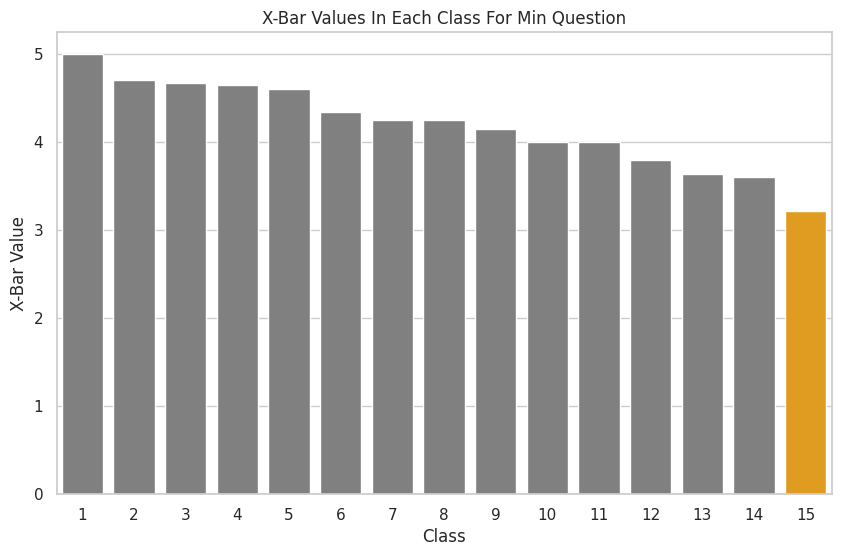

In [ ]:
# Assuming df_class4 is the DataFrame you provided
df_classcov3['color'] = df_classcov3['X-Bar'].idxmin() + 1

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
bar_chart = sns.barplot(x='class', y='X-Bar', data=df_classcov3, palette=['orange' if x == df_classcov3['color'].values[0] else 'gray' for x in df_classcov3['class']])

# Customize the plot
plt.title('X-Bar Values In Each Class For Min Question')
plt.xlabel('Class')
plt.ylabel('X-Bar Value')

# Show the plot
plt.show()

**คำอธิบายโค้ด**
*   เพิ่มคอลัมน์ 'color' ลงใน DataFrame df_classcov3 โดยกำหนดค่าให้เท่ากับอินเด็กซ์ที่มีค่าต่ำสุดในคอลัมน์ 'X-Bar' บวกด้วย 1 ในทุกแถวของคอลัมน์ 'color' เพื่อระบุคลาสที่มีค่า 'X-Bar' ต่ำที่สุด
*   ตั้งค่าสไตล์ของกราฟใน Seaborn เป็น "whitegrid"

*   ใช้ฟังก์ชัน barplot ของ Seaborn โดยกำหนดแกน x เป็นคอลัมน์ 'class' และแกน y เป็นคอลัมน์ 'X-Bar' จาก DataFrame df_classcov3 สีของแต่ละแท่งถูกกำหนดโดยตั้งเงื่อนไข ถ้าคลาสเท่ากับคลาสที่มีค่า 'X-Bar' ต่ำที่สุด จะให้สีส้ม นอกเหนือจากนั้นกราฟแท่งจะให้สีเทา
เพื่อเป็นการแสดงให้เห็นถึงclassที่มีระดับการประเมินเฉลี่ยของคำถาม "ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น" น้อยที่สุด

*   แสดงกราฟด้วยคำสั่ง plt.show()

**คำอธิบายกราฟ**

* แสดงให้เห็นว่ากราฟแท่งที่15 เป็นกราฟที่มีค่าการประเมินน้อยที่สุดของคำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" ซึ่งคือclass"RMW014 - 556574 - 2/2562"





> สรุป

จากกราฟ 'X-Bar Values In Each Class For Min Question' แสดงให้เห็นถึงระดับการประเมินเฉลี่ยของแต่ละclassที่ประเมินคำถามที่ควรปรับปรุงมากที่สุดในสถานการณ์โควิด นั่นคือ คำถาม "ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น" ดังนั้นจะเห็นได้ว่า classที่ 15 "RMW014 - 556574 - 2/2562" มีคะแนนการประเมินเฉลี่ยน้อยที่สุด



## **จุดประสงค์ที่ 4:**   เพื่อแสดงจำนวนของคนที่ทำแบบประเมินและไม่ทำประเมินของห้องเรียนที่มีค่าเฉลี่ยระดับคะแนนประเมินน้อยที่สุดจากการตอบคำถามที่ควรปรับปรุงมากที่สุด

---



### ในสถานการณ์ปกติ
จำนวนของคนที่ทำแบบประเมิน และไม่ทำประเมินของห้องเรียนที่มีค่าเฉลี่ยระดับคะแนนประเมินน้อยที่สุดจากการตอบคำถามที่ควรปรับปรุงมากที่สุด ในสถานการณ์ปกติ

In [ ]:
t = whole
fin = t.dropna().iloc[:,[4,7]].reset_index(drop=True) #4< , 7> #dropna() remove rows that contains null value
fin.columns = ['lower_60','upper_60']
fin['lower_60'] = fin['lower_60'].str.split(" ").str[0].astype(int)
fin['upper_60'] = fin['upper_60'].str.split(" ").str[0].astype(int)
#fin
all_res = []
for topic in t[0].unique():
    cond = t[0] == topic
    res = t[cond][1].reset_index(drop=True).values.tolist()
    res_df = pd.DataFrame(data=res, columns=[topic])
    all_res.append(res_df)

df1 = pd.concat(all_res, axis=1) #เชื่อมแนวนอน ถ้า=0คือเรียงกันในแนวตั้ง
df2 = df1.drop(columns= df1.columns[[7,8,9]])
# Add 'fin' as a new column in df2
df2['lower_60'] = fin['lower_60']
df2['upper_60'] = fin['upper_60']

# Display the resulting DataFrame
#display(df2)/
df_final = df2.drop(columns= df2.columns[6])
#df_final


df_final['จำนวนนักศึกษาที่จดทะเบียน:'] = df_final['จำนวนนักศึกษาที่จดทะเบียน:'].astype(int)
df_final['จำนวนนักศึกษาที่ไม่ประเมิน:'] = df_final['จำนวนนักศึกษาที่จดทะเบียน:'] - df_final['upper_60']
df_final

,รายวิชา:,Sec./Gr.:,ภาคการศึกษาที่:,ระดับการศึกษา:,จำนวนนักศึกษาที่จดทะเบียน:,จำนวนนักศึกษาที่ประเมิน:,lower_60,upper_60,จำนวนนักศึกษาที่ไม่ประเมิน:
0,FGL497,231863,1/2562,ปริญญาตรี โครงการพิเศษ,43,6 (13.95%),0,6,37
1,FGL497,728025,2/2563,ปริญญาตรี โครงการพิเศษ,45,10 (22.22%),0,10,35
2,DRI970,231863,1/2563,ปริญญาตรี โครงการพิเศษ,43,29 (67.44%),1,28,15
3,FGL497,231863,2/2562,ปริญญาตรี โครงการพิเศษ,50,5 (10.00%),0,5,45
4,RMW014,556574,2/2562,ปริญญาตรี โครงการปกติ,511,210 (41.10%),1,209,302
5,NYE553,231863,1/2564,ปริญญาตรี โครงการพิเศษ,46,15 (32.61%),1,14,32
6,RMW014,556574,1/2562,ปริญญาตรี โครงการปกติ,501,94 (18.76%),0,94,407
7,AZW892,231863,2/2564,ปริญญาตรี โครงการพิเศษ,46,33 (71.74%),0,33,13
8,NVI781,231863,1/2564,ปริญญาตรี โครงการพิเศษ,64,35 (54.69%),1,34,30
9,YRY790,231863,2/2561,ปริญญาตรี โครงการพิเศษ,44,7 (15.91%),0,7,37


**คำอธิบายโค้ด**

กำหนด DataFrame สำหรับสร้างกราฟแสดงสัดส่วน

*   กำหนด ให้ DataFrame whole เท่ากับ DataFrame t
สร้าง Dataframe สำหรับดึงค่าจำนวนนักศึกษาที่ทำแบบประเมินโดยแบ่งตามร้อยละการเข้าชั้นเรียน หากร้อยละการเข้าชั้นเรียนน้อยกว่า60 จะไม่ถูกนับว่าทำการประเมิน
*   ใช้คำสั่ง dropna() ตัดแถวที่มีค่า Null ทิ้งทั้งหมด เพื่อให้เหลือแถวที่มีค่า 'ร้อยละการเข้าชั้นเรียนของผู้ตอบแบบประเมิน:' พร้อมเลือกตำแหน่งในDataFrame t ทุกแถวเฉพาะคอลัมน์ที่4 และ7 จากนั้น reset_index
*   กำหนด column 'lower_60' , 'upper_60' ใน DataFrame fin
*   แยกค่าในคอลัมน์ 'lower_60' , 'upper_60' โดยใช้คำสั่ง split(" ") และสนใจแค่ตัวหน้า จากนั้นแปลงให้เป็นประเภท จำนวนเต็ม โดยคำสั่ง astype(int)
* สร้างList all_res ที่จะใช้เก็บ DataFrame
*  กำหนด DataFrame t เฉพาะ คอลัมน์ที่ 0 แล้วใช้คำสั่ง unique()เพื่อหาค่าข้อมูลที่ไม่ซ้ำกันในคอลัมน์ จากนั้นให้loop
* ใช้คำสั่ง unique() หาค่าข้อมูลที่ไม่ซ้ำกันในคอลัมน์ วนลูปข้อมูลที่ไม่ซ้ำกันที่อยู่ในคอลัมน์ที่ 0 ของ DataFrame t
*  สร้างเงื่อนไขที่เป็น Boolean Series เพื่อเลือกแถวที่มีค่าในคอลัมน์ที่ 0 เท่ากับหัวข้อปัจจุบัน
*   สร้างlist res ที่มีค่าในคอลัมน์ที่ 1 ของแถวที่เป็น True ตามเงื่อนไข, แล้วทำการ reset index เพื่อให้ index เริ่มต้นที่ 0 และแปลงให้เป็น integer
*   สร้าง DataFrame res_df โดยให้เก็บค่า resและมีคอลัมน์ตาม topic
*   เพิ่ม DataFrame res_df ลงใน List all_res
*   ดังนั้น ทุกครั้งที่พบtopicใหม่  ในคอลัมน์ที่ 0 ของ DataFrame t, โค้ดจะสร้าง DataFrame ใหม่สำหรับหัวข้อนั้นและเก็บไว้ใน all_res. สุดท้าย, all_res จะมีรายการของ DataFrame ที่เก็บข้อมูลสำหรับแต่ละtopic.
*  สร้าง Dataframe df1 โดยใช้คำสั่ง concat() เพื่อรวม List all_res ทั้งหมดเข้าด้วยกัน
*   แสดงเฉพาะค่าในคอลัมน์ที่ 7,8,9  ใน Dataframe df2 จาก Dataframe df1
*   เพิ่มคอลัมน์ 'lower_60' ใน Dataframe df2 จากคอลัมน์ 'lower_60' ใน DataFrame fin
*    เพิ่มคอลัมน์ 'upper_60' ใน Dataframe df2 จากคอลัมน์ 'upper_60' ใน DataFrame fin
*   สร้าง DataFrame df_finalโดยการตัดคอลัมน์ที่ 6 ในDataFrame df2
*   แปลงคอลัมน์ 'จำนวนนักศึกษาที่จดทะเบียน:'ใน Dataframe df_final ให้เป็น จำนวนเต็ม
*   สร้างคอลัมน์ 'จำนวนนักศึกษาที่ไม่ประเมิน:' ใน DataFrame df_final โดยกำหนดค่าในคอลัมน์ จากการลบกันของคอลัมน์'จำนวนนักศึกษาที่จดทะเบียน:' และ 'upper_60'
*   แสดง DataFrame df_final

**คำอธิบายdataframe**

* แสดงให้เห็นถึง ชื่อsubject section semester degree review register จำนวนคนประเมินและไม่ประเมิน กับจำนวนคนที่ประเมินแต่เข้าเรียนไม่ถึง 60% เพื่อที่จะนำไปสร้างกราฟและตอบคำถามต่อไป

In [ ]:
df_n = df_final[(df_final['รายวิชา:']=='YRY790')]
df_normal = df_n[(df_n['Sec./Gr.:']=='728025')]
df_normal

**คำอธิบายโค้ด**
* กำหนดขอบเขต DataFrame ให้มีเฉพาะclassที่สนใจ นั่นคือ Class วิชา YRY790 sec 728025	ภาคการศึกษาที่ 1/2563
*   สร้าง Dataframe df_n ที่มีการกรองข้อมูลใน DataFrame df_final โดยเลือกเฉพาะแถวที่มีค่า 'YRY790  ในคอลัมน์ 'รายวิชา:'
*   สร้าง Dataframe df_normal ที่มีการกรองข้อมูลใน DataFrame df_n โดยเลือกเฉพาะแถวที่มีค่า '728025'  ในคอลัมน์ 'Sec./Gr.:'
*   แสดง DataFrame df_normal

**คำอธิบายdataframe**

* แสดงให้เห็นถึง ชื่อsubject section semester degree review register จำนวนคนประเมินและไม่ประเมิน กับจำนวนคนที่ประเมินแต่เข้าเรียนไม่ถึง 60% เพื่อที่จะนำไปสร้างกราฟและตอบคำถามต่อไป


In [ ]:
df_donormal = [df_normal['upper_60'].to_list()[0] ,df_normal['จำนวนนักศึกษาที่ไม่ประเมิน:'].to_list()[0]]
labels=['จำนวนนักศึกษาที่ประเมิน', 'จำนวนนักศึกษาที่ไม่ประเมิน']
plt.pie(df_donormal, labels=labels, colors=['lightgreen','red'],autopct='%1.1f%%', startangle=90,pctdistance=0.85)
# สร้างวงกลมสีขาว
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# ใส่วงกลมไปตรงกลาง
fig.gca().add_artist(centre_circle)

# ใส่ title
plt.title('YRY790-728025-1/2563 Response Ratio(normal)')

#เขียนจำนวนแต่ละแบบไว้ทางขวา
plt.axis('equal')
for i, label in enumerate(labels):
    plt.annotate(f"{label} ({df_donormal[i]}คน)", xy=(1.3, -0.35 - 0.1 * i), ha='center')
#บอกความหมายแต่ละสี
plt.legend(['จำนวนนักศึกษาที่ประเมิน', 'จำนวนนักศึกษาที่ไม่ประเมิน'], loc='upper right')


plt.show()

NameError: name 'df_normal' is not defined

**คำอธิบายโค้ด**
*   สร้าง list df_donormal เพื่อเก็บจำนวนนักศึกษาที่ประเมินและไม่ประเมินจาก DataFrame df_normal
*   กำหนดป้ายให้กับแต่ละส่วนของ Pie Chart
*   ใช้ plt.pie เพื่อสร้าง Pie Chart โดยใช้ข้อมูลจาก df_donormal, ป้ายจาก labels, กำหนดสีให้แต่ละส่วน, แสดงเปอร์เซ็นต์ด้วย autopct, และกำหนดมุมเริ่มต้นด้วย startangle. pctdistance ใช้กำหนดระยะห่างระหว่างเปอร์เซ็นต์และวงกลมศูนย์กลาง
*   สร้างวงกลมสีขาวที่อยู่ตรงกลาง Pie Chart เพื่อทำให้เป็น Donut Chart
*   ดึงข้อมูล Figure ที่ใช้สร้างกราฟ
*   กำหนดหัวข้อ (Title) ของ Pie Chart
*   ใช้ plt.annotate เพื่อเขียนจำนวนของแต่ละกลุ่มไว้ทางขวาของ Pie Chart
*   เพิ่มคำอธิบาย (Legend) ด้วยชื่อคลาสที่กำหนด
*ใช้ plt.show() เพื่อแสดง Pie Chart ที่สร้างขึ้น

**คำอธิบายกราฟ**
* แสดงให้เห็นว่า ในช่วงสถานการณ์ปกติวิชาYRY790sec728025term1/2563มีจำนวนนักศึกษาที่ประเมิน 8คนจากทั้งหมด51คน คิดเป็นเปอร์เซ็นต์ได้ 18.2%  และมีจำนวนคนที่ไม่ประเมิน 36คนจากทั้งหมด51คน คิดเป็นเปอร์เซ็นต์ได้ 81.8%








> สรุป

กราฟแสดงการเปรียบเทียบของจำนวนคนที่ประเมินและจำนวนคนไม่ประเมินเพื่อหาว่าวิชาYRY790sec728025term1/2563 มีคนประเมินหรือไม่ประเมินมากกว่ากัน สรุปแล้วคือ มีคนไม่ประเมินมากกว่า ดังนั้นแสดงว่าคนส่วนใหญ่ในวิชานี้ไม่ค่อยสนใจการประเมิน

### ในสถานการณ์โควิด
จำนวนของคนที่ทำแบบประเมิน และไม่ทำประเมินของห้องเรียนที่มีค่าเฉลี่ยระดับคะแนนประเมินน้อยที่สุดจากการตอบคำถามที่ควรปรับปรุงมากที่สุด ในสถานการณ์โควิด

In [ ]:
t = whole
fin = t.dropna().iloc[:,[4,7]].reset_index(drop=True) #4< , 7> #dropna() remove rows that contains null value
fin.columns = ['lower_60','upper_60']
fin['lower_60'] = fin['lower_60'].str.split(" ").str[0].astype(int)
fin['upper_60'] = fin['upper_60'].str.split(" ").str[0].astype(int)
#fin

all_res = []
for topic in t[0].unique():
    cond = t[0] == topic
    res = t[cond][1].reset_index(drop=True).values.tolist()
    res_df = pd.DataFrame(data=res, columns=[topic])
    all_res.append(res_df)

df1 = pd.concat(all_res, axis=1) #เชื่อมแนวนอน ถ้า=0คือเรียงกันในแนวตั้ง
df2 = df1.drop(columns= df1.columns[[7,8,9]])
# Add 'fin' as a new column in df2
df2['lower_60'] = fin['lower_60']
df2['upper_60'] = fin['upper_60']


#display(df2)
df_final = df2.drop(columns= df2.columns[6])
#df_final


df_final['จำนวนนักศึกษาที่จดทะเบียน:'] = df_final['จำนวนนักศึกษาที่จดทะเบียน:'].astype(int)
df_final['จำนวนนักศึกษาที่ไม่ประเมิน:'] = df_final['จำนวนนักศึกษาที่จดทะเบียน:'] - df_final['upper_60']
df_final

**คำอธิบาย**

กำหนด DataFrame สำหรับสร้างกราฟแสดงสัดส่วน

*   กำหนด ให้ DataFrame whole เท่ากับ DataFrame t
สร้าง Dataframe สำหรับดึงค่าจำนวนนักศึกษาที่ทำแบบประเมินโดยแบ่งตามร้อยละการเข้าชั้นเรียน หากร้อยละการเข้าชั้นเรียนน้อยกว่า60 จะไม่ถูกนับว่าทำการประเมิน
*   ใช้คำสั่ง dropna() ตัดแถวที่มีค่า Null ทิ้งทั้งหมด เพื่อให้เหลือแถวที่มีค่า 'ร้อยละการเข้าชั้นเรียนของผู้ตอบแบบประเมิน:' พร้อมเลือกตำแหน่งในDataFrame t ทุกแถวเฉพาะคอลัมน์ที่4 และ7 จากนั้น reset_index
*   กำหนด column 'lower_60' , 'upper_60' ใน DataFrame fin
*   แยกค่าในคอลัมน์ 'lower_60' , 'upper_60' โดยใช้คำสั่ง split(" ") และสนใจแค่ตัวหน้า จากนั้นแปลงให้เป็นประเภท จำนวนเต็ม โดยคำสั่ง astype(int)
* สร้างList all_res ที่จะใช้เก็บ DataFrame
*  กำหนด DataFrame t เฉพาะ คอลัมน์ที่ 0 แล้วใช้คำสั่ง unique()เพื่อหาค่าข้อมูลที่ไม่ซ้ำกันในคอลัมน์ จากนั้นให้loop
* ใช้คำสั่ง unique() หาค่าข้อมูลที่ไม่ซ้ำกันในคอลัมน์ วนลูปข้อมูลที่ไม่ซ้ำกันที่อยู่ในคอลัมน์ที่ 0 ของ DataFrame t
*  สร้างเงื่อนไขที่เป็น Boolean Series เพื่อเลือกแถวที่มีค่าในคอลัมน์ที่ 0 เท่ากับหัวข้อปัจจุบัน
*   สร้างlist res ที่มีค่าในคอลัมน์ที่ 1 ของแถวที่เป็น True ตามเงื่อนไข, แล้วทำการ reset index เพื่อให้ index เริ่มต้นที่ 0 และแปลงให้เป็น integer
*   สร้าง DataFrame res_df โดยให้เก็บค่า resและมีคอลัมน์ตาม topic
*   เพิ่ม DataFrame res_df ลงใน List all_res
*   ดังนั้น ทุกครั้งที่พบtopicใหม่  ในคอลัมน์ที่ 0 ของ DataFrame t, โค้ดจะสร้าง DataFrame ใหม่สำหรับหัวข้อนั้นและเก็บไว้ใน all_res. สุดท้าย, all_res จะมีรายการของ DataFrame ที่เก็บข้อมูลสำหรับแต่ละtopic.
*  สร้าง Dataframe df1 โดยใช้คำสั่ง concat() เพื่อรวม List all_res ทั้งหมดเข้าด้วยกัน
*   แสดงเฉพาะค่าในคอลัมน์ที่ 7,8,9  ใน Dataframe df2 จาก Dataframe df1
*   เพิ่มคอลัมน์ 'lower_60' ใน Dataframe df2 จากคอลัมน์ 'lower_60' ใน DataFrame fin
*    เพิ่มคอลัมน์ 'upper_60' ใน Dataframe df2 จากคอลัมน์ 'upper_60' ใน DataFrame fin
*   สร้าง DataFrame df_finalโดยการตัดคอลัมน์ที่ 6 ในDataFrame df2
*   แปลงคอลัมน์ 'จำนวนนักศึกษาที่จดทะเบียน:'ใน Dataframe df_final ให้เป็น จำนวนเต็ม
*   สร้างคอลัมน์ 'จำนวนนักศึกษาที่ไม่ประเมิน:' ใน DataFrame df_final โดยกำหนดค่าในคอลัมน์ จากการลบกันของคอลัมน์'จำนวนนักศึกษาที่จดทะเบียน:' และ 'upper_60'
*   แสดง DataFrame df_final

**คำอธิบายdataframe**

* แสดงให้เห็นถึง ชื่อsubject section semester degree review register จำนวนคนประเมินและไม่ประเมิน กับจำนวนคนที่ประเมินแต่เข้าเรียนไม่ถึง 60% เพื่อที่จะนำไปสร้างกราฟและตอบคำถามต่อไป

In [ ]:
df_c = df_final[(df_final['รายวิชา:']=='RMW014')]
df_covid = df_c[(df_c['Sec./Gr.:']=='556574')]
df_covid = df_covid[(df_covid['ภาคการศึกษาที่:']=='2/2562')]
df_covid

**คำอธิบาย**

กำหนดขอบเขต DataFrame ให้มีเฉพาะclassที่สนใจ นั่นคือ Class วิชา RMW014 sec 556574	ภาคการศึกษาที่ 2/2562
*   สร้าง Dataframe df_c ที่มีการกรองข้อมูลใน DataFrame df_final โดยเลือกเฉพาะแถวที่มีค่า 'RMW014'  ในคอลัมน์ 'รายวิชา:'
*   สร้าง Dataframe df_covid ที่มีการกรองข้อมูลใน DataFrame df_c โดยเลือกเฉพาะแถวที่มีค่า '556574'  ในคอลัมน์ 'Sec./Gr.:'
*   สร้าง Dataframe df_covid ที่มีการกรองข้อมูลใน DataFrame df_covid โดยเลือกเฉพาะแถวที่มีค่า '2/2562'  ในคอลัมน์ 'ภาคการศึกษาที่:'
*   แสดง DataFrame df_covid

**คำอธิบายdataframe**

* แสดงให้เห็นถึง ชื่อsubject section semester degree review register จำนวนคนประเมินและไม่ประเมิน กับจำนวนคนที่ประเมินแต่เข้าเรียนไม่ถึง 60% เพื่อที่จะนำไปสร้างกราฟและตอบคำถามต่อไป


In [ ]:
df_docovid = [df_covid['upper_60'].to_list()[0] ,df_covid['จำนวนนักศึกษาที่ไม่ประเมิน:'].to_list()[0]]
labels=['จำนวนนักศึกษาที่ประเมิน', 'จำนวนนักศึกษาที่ไม่ประเมิน']
plt.pie(df_docovid, labels=labels, colors=['lightgreen','red'],autopct='%1.1f%%', startangle=90,pctdistance=0.85)
# สร้างวงกลมสีขาว
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()

# ใส่วงกลมไปตรงกลาง
fig.gca().add_artist(centre_circle)

# ใส่ title
plt.title('RMW014-556574,-2/2562 Response Ratio(covid)')

#เขียนจำนวนแต่ละแบบไว้ทางขวา
plt.axis('equal')
for i, label in enumerate(labels):
    plt.annotate(f"{label} ({df_docovid[i]}คน)", xy=(1.3, -0.60 - 0.1 * i), ha='center')
#บอกความหมายแต่ละสี
plt.legend(['จำนวนนักศึกษาที่ประเมิน', 'จำนวนนักศึกษาที่ไม่ประเมิน'], loc='upper right')


plt.show()


**คำอธิบายโค้ด**
*   สร้าง list df_docovid เพื่อเก็บจำนวนนักศึกษาที่ประเมินและไม่ประเมินจาก DataFrame df_covid
*   กำหนดป้ายให้กับแต่ละส่วนของ Pie Chart
*   ใช้ plt.pie เพื่อสร้าง Pie Chart โดยใช้ข้อมูลจาก df_docovid, ป้ายจาก labels, กำหนดสีให้แต่ละส่วน, แสดงเปอร์เซ็นต์ด้วย autopct, และกำหนดมุมเริ่มต้นด้วย startangle. pctdistance ใช้กำหนดระยะห่างระหว่างเปอร์เซ็นต์และวงกลมศูนย์กลาง
*   สร้างวงกลมสีขาวที่อยู่ตรงกลาง Pie Chart เพื่อทำให้เป็น Donut Chart
*   ดึงข้อมูล Figure ที่ใช้สร้างกราฟ
*   กำหนดหัวข้อ (Title) ของ Pie Chart
*   ใช้ plt.annotate เพื่อเขียนจำนวนของแต่ละกลุ่มไว้ทางขวาของ Pie Chart
*   เพิ่มคำอธิบาย (Legend) ด้วยชื่อคลาสที่กำหนด
*ใช้ plt.show() เพื่อแสดง Pie Chart ที่สร้างขึ้น

**คำอธิบายกราฟ**
* แสดงให้เห็นว่า ในช่วงสถานการณโควิดวิชาRMW014sec556574term2/2562มีจำนวนนักศึกษาที่ประเมิน 209คนจากทั้งหมด511คน คิดเป็นเปอร์เซ็นต์ได้ 40.9%  และมีจำนวนคนที่ไม่ประเมิน 302คนจากทั้งหมด511คน คิดเป็นเปอร์เซ็นต์ได้ 59.1%




> สรุป

กราฟแสดงการเปรียบเทียบของจำนวนคนที่ประเมินและจำนวนคนไม่ประเมินเพื่อหาว่าวิชาRMW014sec556574term2/2562 มีคนประเมินหรือไม่ประเมินมากกว่ากัน สรุปแล้วคือ มีคนไม่ประเมินมากกว่า ดังนั้นแสดงว่าคนส่วนใหญ่ในวิชานี้ไม่ค่อยสนใจการประเมิน



## สรุปทั้งหมด


---

**1.จุดประสงค์ที่ 1: สำรวจจำนวนclassทั้งหมดที่เปิดสอน และแบ่งตาม2สถานการณ์ นั่นคือ สถานการณ์ปกติ(normal) และ สถานการณ์โควิด(covid)**

ดังนั้น
* ห้องเรียนทั้งหมด26ห้องเรียน ห้องเรียนในสถานการณ์โควิด 15ห้องเรียน คิดเป็นเปอร์ของห้องเรียนทั้งหมดคือ 57.7%

  จากห้องเรียนทั้งหมด26ห้องเรียน ห้องเรียนในสถานการณ์ปกติ 11ห้องเรียน คิดเป็นเปอร์ของห้องเรียนทั้งหมดคือ 42.3%

จะได้ว่า
* ต้องการให้เห็นว่าจากห้องเรียนทั้งหมด26ห้องเรียน ห้องเรียนในสถานการณ์โควิด มีมากกว่าห้องเรียนในสถานการณ์ปกติ

**2.จุดประสงค์ที่ 2: สำรวจคำถามที่มีระดับการประเมินเฉลี่ยจากทุกclassต่ำที่สุดเพื่อนำไปพัฒนาการสอน โดยแยกเป็น2สถานการณ์ นั่นคือ สถานการณ์ปกติ(normal) และ สถานการณ์โควิด(covid)**

ดังนั้น    **ในสถานการณ์ปกติ**

* แสดงให้เห็นถึงคำถามที่มีการประเมินเฉลี่ยน้อยสุดคือ การกระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม ซึ่งได้ค่าเฉลี่ยการประเมินคือ 3.67

จะได้ว่า

* กราฟแสดงการเปรียบเทียบระดับการประเมินเฉลี่ยของคำถามส่วนที่1จากทุกclassในสถานการณ์ปกติ เพื่อพิจารณาหาคำถามจากส่วนคำถามที่ 1ที่มีระดับการประเมินเฉลี่ยจากทุกclassน้อยที่สุด และสามารถนำไปปรับปรุง สำหรับการพัฒนาการสอนต่อไป ซึ่งคำถามที่มีการประเมินเฉลี่ยน้อยสุดคือ การกระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม อาจวิเคราะห์ได้ว่า อาจารย์สอนน่าเบื่อและไม่มีสิ่งกระตุ้นการเรียนการสอน ดังนั้นอาจารย์ควรทำให้การเรียนการสอนน่าสนใจขึ้นและไม่น่าเบื่อ โดยการเพิ่มเทคนิคเข้าไป สังเกตุว่านักเรียนชอบการเรียนการสอนแบบไหน เพื่อที่จะปรับปรุง อาจะทำแบบสอบถาม เพื่อปรุบปรุงการเรียนการสอนให้ดีขึ้น
    
ดังนั้น  **ในสถานการณ์โควิด**

* แสดงให้เห็นถึงคำถามที่มีการประเมินเฉลี่ยน้อยสุดคือ ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น ซึ่งได้ค่าเฉลี่ยการประเมินคือ 4.19

จะได้ว่า

* กราฟแสดงการเปรียบเทียบระดับการประเมินเฉลี่ยของคำถามจากทุกclassในสถานการณ์โควิด เพื่อพิจารณาหาคำถามที่มีระดับการประเมินเฉลี่ยจากทุกclassน้อยที่สุด และสามารถนำไปปรับปรุง สำหรับการพัฒนาการสอนต่อไป ซึ่งคำถามที่ที่มีการประเมินน้อยที่สุดคือ ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น อาจวิเคราะห์ได้ว่า อาจารย์อาจจะสอนไม่ตรงประเด็น นอกเรื่อง และไม่ได้มีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ ดังนั้น อาจารย์ไม่ควรออกนอกเรื่องของการเรียนการสอนมากเกินไป เพราะอาจจะทำให้สอนไม่ทันได้ และเรื่องการสอนไม่ตรงประเด็น เพราะพูดออกนอกเรื่อง ควรปรับปรุง

3.**จุดประสงค์ที่ 3 :  เพื่อหาclassที่มีระดับคะแนนการประเมินเฉลี่ยต่ำสุด จากข้อคำถามที่มีระดับการประเมินเฉลี่ยจากทุกclassน้อยที่สุดในแต่ละสถานการณ์**

ดังนั้น    **ในสถานการณ์ปกติ**
* แสดงให้เห็นว่ากราฟแท่งที่11 เป็นกราฟที่มีค่าการประเมินน้อยที่สุดของคำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" ซึ่งคือclass"YRY790 - 728025 - 1/2563	"

จะได้ว่า

* กราฟ 'X-Bar In Each Class For Min Question Normal' แสดงให้เห็นถึงระดับการประเมินเฉลี่ยของแต่ละclassที่ประเมินคำถามที่ควรปรับปรุงมากที่สุดในสถานการณ์ปกติ นั่นคือ คำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" ดังนั้นจะเห็นได้ว่า classที่ 11 "YRY790 - 728025 - 1/2563 " มีคะแนนการประเมินเฉลี่ยน้อยที่สุด

ดังนั้น  **ในสถานการณ์โควิด**
* แสดงให้เห็นว่ากราฟแท่งที่15 เป็นกราฟที่มีค่าการประเมินน้อยที่สุดของคำถาม "กระตุ้นบรรยากาศการเรียนการสอน มีวิธีสอนที่น่าสนใจและน่าติดตาม" ซึ่งคือclass"RMW014 - 556574 - 2/2562"

จะได้ว่า
* กราฟ 'X-Bar Values In Each Class For Min Question' แสดงให้เห็นถึงระดับการประเมินเฉลี่ยของแต่ละclassที่ประเมินคำถามที่ควรปรับปรุงมากที่สุดในสถานการณ์โควิด นั่นคือ คำถาม "ผู้สอนอธิบายชัดเจน ตรงประเด็น มีการยกตัวอย่างประกอบให้เข้าใจง่าย และมีการใช้สื่อการสอนที่สามารถเชื่อมโยงกับเนื้อหาที่สอนให้ผู้เรียนเกิดการเรียนรู้ได้ดีขึ้น" ดังนั้นจะเห็นได้ว่า classที่ 15 "RMW014 - 556574 - 2/2562" มีคะแนนการประเมินเฉลี่ยน้อยที่สุด

**จุดประสงค์ที่ 4:   เพื่อแสดงจำนวนของคนที่ทำแบบประเมินและไม่ทำประเมินของห้องเรียนที่มีค่าเฉลี่ยระดับคะแนนประเมินน้อยที่สุดจากการตอบคำถามที่ควรปรับปรุงมากที่สุด**

ดังนั้น    **ในสถานการณ์ปกติ**
* แสดงให้เห็นว่า ในช่วงสถานการณ์ปกติวิชาYRY790sec728025term1/2563มีจำนวนนักศึกษาที่ประเมิน 8คนจากทั้งหมด51คน คิดเป็นเปอร์เซ็นต์ได้ 18.2%  และมีจำนวนคนที่ไม่ประเมิน 36คนจากทั้งหมด51คน คิดเป็นเปอร์เซ็นต์ได้ 81.8%

จะได้ว่า
* กราฟแสดงการเปรียบเทียบของจำนวนคนที่ประเมินและจำนวนคนไม่ประเมินเพื่อหาว่าวิชาYRY790sec728025term1/2563 มีคนประเมินหรือไม่ประเมินมากกว่ากัน สรุปแล้วคือ มีคนไม่ประเมินมากกว่า แสดงว่าคนส่วนใหญ่ในวิชานี้ไม่ค่อยสนใจการประเมิน

ดังนั้น  **ในสถานการณ์โควิด**
* แสดงให้เห็นว่า ในช่วงสถานการณโควิดวิชาRMW014sec556574term2/2562มีจำนวนนักศึกษาที่ประเมิน 209คนจากทั้งหมด511คน คิดเป็นเปอร์เซ็นต์ได้ 40.9%  และมีจำนวนคนที่ไม่ประเมิน 302คนจากทั้งหมด511คน คิดเป็นเปอร์เซ็นต์ได้ 59.1%

จะได้ว่า
* กราฟแสดงการเปรียบเทียบของจำนวนคนที่ประเมินและจำนวนคนไม่ประเมินเพื่อหาว่าวิชาRMW014sec556574term2/2562 มีคนประเมินหรือไม่ประเมินมากกว่ากัน สรุปแล้วคือ มีคนไม่ประเมินมากกว่า แสดงว่าคนส่วนใหญ่ในวิชานี้ไม่ค่อยสนใจการประเมิน

**สรุปจากคำถามทั้งหมด**
* สุดท้ายแล้วเราต้องการหาคำถามที่มีปัญหามากที่สุดของทั้ง2สถานการณ์ค่ะ แต่การสรุปทั้งหมดของโปรเจคเราเป็นเพียงการใช้ข้อมูลของคะที่ประเมินส่วนน้อย เพราะเราได้ผลลัพธ์ว่าจากการประเมินของทุกclass มีคนที่ไม่ประเมินมากกว่า
